# <center> IIIT Vadodara </center>
## <center> Winter 2021-22 </center>
## <center> CS 612, CS 652, CS/IT 308 Machine Learning </center>
## <center> Lab#6 Support vector machine (SVM)</center>

**Problem 1)** Classify the given data using linear SVM algorithm.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm

In [2]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

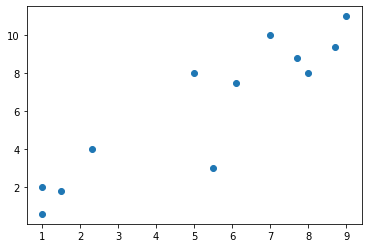

In [3]:
# show unclassified data
plt.scatter(X, y)
plt.show()

In [4]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [8]:
training_X = np.vstack((X, y)).T
print(training_X)

[[ 1.   2. ]
 [ 5.   8. ]
 [ 1.5  1.8]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]
 [ 7.  10. ]
 [ 8.7  9.4]
 [ 2.3  4. ]
 [ 5.5  3. ]
 [ 7.7  8.8]
 [ 6.1  7.5]]


In [9]:
# define the model

#defined the model using linear kernel
clf = svm.SVC(kernel='linear', C=1.0)


In [10]:
# train the model

#for training the model 
clf.fit(training_X, training_y)


SVC(kernel='linear')

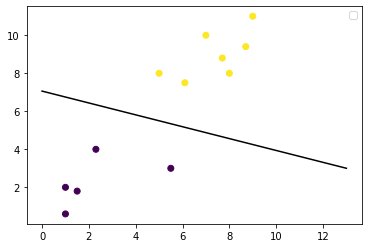

In [32]:
# get the weight values for the linear equation from the trained SVM model
w = clf.coef_[0]

# get the y-offset for the linear equation
a = -w[0] / w[1]

# make the x-axis space for the data points
X1 = np.linspace(0, 13)

# get the y-values to plot the decision boundary
y1 = a * X1 - clf.intercept_[0] / w[1]

# plot the decision boundary
plt.plot(X1, y1, 'k-')


# show the plot visually
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)
plt.legend("")
plt.show()



**Problem 2)** Load the data. The data description can be found in below link.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<br>

Split the data to train and test set. More information can be found here.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>

Write a code for linear SVM model. Examples can be found here.

https://github.com/soloice/SVM-python

https://gist.github.com/mblondel/586753/f740949d0336484567dd422fe53445ac8821f5b2

<br>

Learn and test the model for different hyperparameters and check the accuracy.


In [14]:
#Write your code here.
from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import accuracy_score

#loading the data
data = pd.read_csv("data_banknote_authentication.txt") 

X=np.array(data)[:,:-1]
y=np.array(data)[:,-1]


training_X, testing_X, training_y, testing_y = train_test_split(X, y,test_size=0.33, random_state=42)


model=svm.SVC(kernel='linear')

model.fit(training_X,training_y)

SVC(kernel='linear')

In [8]:
w = model.coef_[0]


print("\nSlopes : ",w)
print("\nIntercept : ",model.intercept_[0])
len(w),model.get_params(deep=True)


Slopes :  [-2.32123207 -1.35470289 -1.64925823 -0.22290585]

Intercept :  2.2147087072183176


(4,
 {'C': 1.0,
  'break_ties': False,
  'cache_size': 200,
  'class_weight': None,
  'coef0': 0.0,
  'decision_function_shape': 'ovr',
  'degree': 3,
  'gamma': 'scale',
  'kernel': 'linear',
  'max_iter': -1,
  'probability': False,
  'random_state': None,
  'shrinking': True,
  'tol': 0.001,
  'verbose': False})

In [9]:
print("Accuracy")
model.score(testing_X,testing_y)

Accuracy


0.9845474613686535

In [15]:
y_pred = model.predict(testing_X)
print("Confusion matrix : \n",confusion_matrix(testing_y, y_pred))

Confusion matrix : 
 [[253   4]
 [  3 193]]


In [16]:
y_pred = model.predict(X)
print(len(X),len(y))
print("Confusion matrix : \n",confusion_matrix(y, y_pred))
print("Score : ",model.score(X,y))

#get the weight values
# w = clf1.coef_[0]

1371 1371
Confusion matrix : 
 [[751  10]
 [  7 603]]
Score :  0.987600291757841


In [20]:
c = [0.01,0.1,1,10,100]
for i in c:
    model=SVC(kernel='linear',C = i)
    model.fit(training_X,training_y)
    print("Accuracy")
    print(model.score(testing_X,testing_y))
    y_pred = model.predict(testing_X)
    print("Confusion matrix : \n",confusion_matrix(testing_y, y_pred))
    print("Score : ",model.score(X,y))

Accuracy
0.9823399558498896
Confusion matrix : 
 [[249   8]
 [  0 196]]
Score :  0.9832239241429613
Accuracy
0.9867549668874173
Confusion matrix : 
 [[251   6]
 [  0 196]]
Score :  0.9883296863603209
Accuracy
0.9845474613686535
Confusion matrix : 
 [[253   4]
 [  3 193]]
Score :  0.987600291757841
Accuracy
0.9867549668874173
Confusion matrix : 
 [[253   4]
 [  2 194]]
Score :  0.9883296863603209
Accuracy
0.9845474613686535
Confusion matrix : 
 [[254   3]
 [  4 192]]
Score :  0.9905178701677607


**Problem 3)** Classify the given data using non-linear SVM.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [13]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

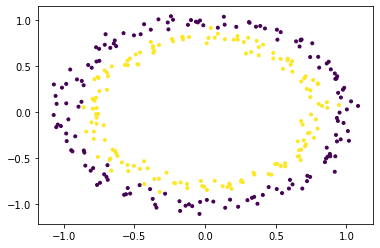

In [14]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [15]:
# make non-linear algorithm for model
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0)



In [16]:
# training non-linear model
nonlinear_clf.fit(circle_X, circle_y)

SVC()

In [24]:
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])

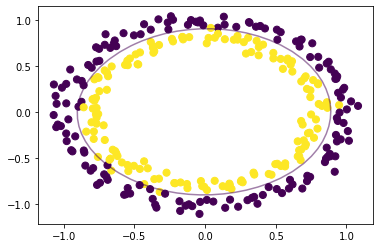

In [26]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(nonlinear_clf)
plt.scatter(nonlinear_clf.support_vectors_[:, 0], nonlinear_clf.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()


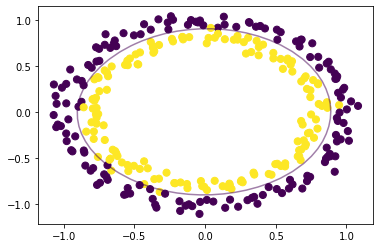